# **Problem Statement:** Pokemon Data Analysis

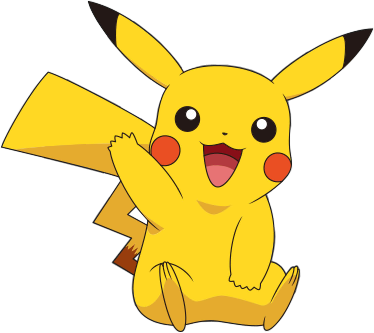

## **Description:**
* **Which Pokemon are the strongest?:** You could analyze the stats of each Pokemon to see which ones have the highest Attack, Defense, Special Attack, Special Defense, and Speed. You could also look at the Pokemon's typing to see if there are any patterns in which types are stronger than others.
Which Pokemon are the most popular? You could analyze the data from the Pokemon games or from social media to see which Pokemon are the most popular. You could look at things like the number of times each Pokemon is used in battle, the number of times it is traded, or the number of times it is mentioned on social media.
* **Which Pokemon are the best for competitive battling?:** You could analyze the data from competitive Pokemon tournaments to see which Pokemon are the most successful. You could look at things like the win rate of each Pokemon, the number of times it is used in tournaments, or the number of times it has won tournaments.
* **Which Pokemon are the most difficult to catch?:** You could analyze the data from the Pokemon games to see which Pokemon are the most difficult to catch. You could look at things like the Pokemon's catch rate, the number of times it has been caught, or the number of times it has escaped from a Pokeball.
Which Pokemon are the most expensive? You could analyze the data from online Pokemon trading markets to see which Pokemon are the most expensive. You could look at things like the average price of each Pokemon, the highest price that a Pokemon has been sold for, or the number of times a Pokemon has been sold.


In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importing Librares

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,make_scorer,roc_curve
import scikitplot as skplt
import seaborn as sns
from scipy import stats
import datetime
from sklearn import tree

from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.metrics import brier_score_loss, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV as CCV
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")



# 2. The Datasets

## 2.1 Pokemon Data
Here are some additional details about the features in the Pokemon dataset:

* **Name:** The name of the Pokemon is a string. It is typically a single word, but there are some exceptions, such as "Mewtwo" and "Mew."
* **Type 1:** The first type of the Pokemon is a string. There are 18 different types, such as "Fire," "Water," and "Grass."
* **Type 2:** The second type of the Pokemon is a string. Some Pokemon have two types, while others have only one.
* **Total:** The total stats of the Pokemon is an integer. It is calculated by adding up the Pokemon's HP, Attack, Defense, Special Attack, Special Defense, and Speed stats.
* **HP:** The hit points of the Pokemon is an integer. It represents the Pokemon's health.
* **Attack:** The attack stat of the Pokemon is an integer. It represents the Pokemon's damage output.
* **Defense:** The defense stat of the Pokemon is an integer. It represents the Pokemon's ability to withstand damage.
* **Special Attack:** The special attack stat of the Pokemon is an integer. It represents the Pokemon's damage output from special moves.
* **Special Defense:** The special defense stat of the Pokemon is an integer. It represents the Pokemon's ability to withstand damage from special moves.
* **Speed:** The speed stat of the Pokemon is an integer. It represents the Pokemon's ability to move first in battle.
* **Generation:** The generation that the Pokemon was introduced in is an integer. There have been 9 generations of Pokemon so far.
* **Legendary:** Whether the Pokemon is legendary or not is a boolean value. Legendary Pokemon are rare and powerful.
* **Base Experience:** The base experience points that the Pokemon gives when defeated is an integer. It is used to calculate the amount of experience that a trainer gains when they defeat the Pokemon.
* **Image:** The URL of the image for the Pokemon is a string. The image is a .png file that shows the Pokemon.

In [223]:
#pokemon=pd.read_csv("Pokemon.csv")
pokemon=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_PROJECT/Pokemon Winner Prediction/Pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [224]:
pokemon.shape

(800, 13)

## 2.2 Combat Data
Here are some additional details about the features in the Combats dataset:

* **id:** The ID of the combat is an integer. It is a unique identifier for each combat.
* **turn:** The turn number is an integer. It represents the number of turns that have taken place in the combat.
* **attacker_id:** The ID of the attacker Pokemon is an integer. It is the ID of the Pokemon that used the move.
* **defender_id:** The ID of the defender Pokemon is an integer. It is the ID of the Pokemon that was hit by the move.
* **move_id:** The ID of the move is an integer. It is the ID of the move that was used.
* **damage:** The amount of damage that was dealt is an integer. It represents the amount of health that was lost by the defender Pokemon.
* **critical_hit:** Whether the move was a critical hit is a boolean value. Critical hits deal double damage.
* **miss:** Whether the move missed is a boolean value. Moves can miss if the attacker or defender is too fast or too slow.
* **status_condition:** The status condition that was inflicted, if any, is a string. There are a number of different status conditions, such as "Burn," "Paralysis," and "Poison."
* **status_duration:** The duration of the status condition, if any, is an integer. It represents the number of turns that the status condition will last

In [225]:
#battles=pd.read_csv("combats.csv")
battles=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_PROJECT/Pokemon Winner Prediction/combats.csv")
battles.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


# 3. Data Exploration

In [226]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


* Relationship between numeric feature

In [227]:
# set option to print only upto 2 decimal point
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,362.81,435.10,69.26,79.00,73.84,72.82,71.90,68.28,3.32
std,208.34,119.96,25.53,32.46,31.18,32.72,27.83,29.06,1.66
min,1.00,180.00,1.00,5.00,5.00,10.00,20.00,5.00,1.00
25%,184.75,330.00,50.00,55.00,50.00,49.75,50.00,45.00,2.00
50%,364.50,450.00,65.00,75.00,70.00,65.00,70.00,65.00,3.00
75%,539.25,515.00,80.00,100.00,90.00,95.00,90.00,90.00,5.00
max,721.00,780.00,255.00,190.00,230.00,194.00,230.00,180.00,6.00


# 4. Data Visualization

In [228]:
plt.style.use('dark_background')

Text(0, 0.5, 'Frequency')

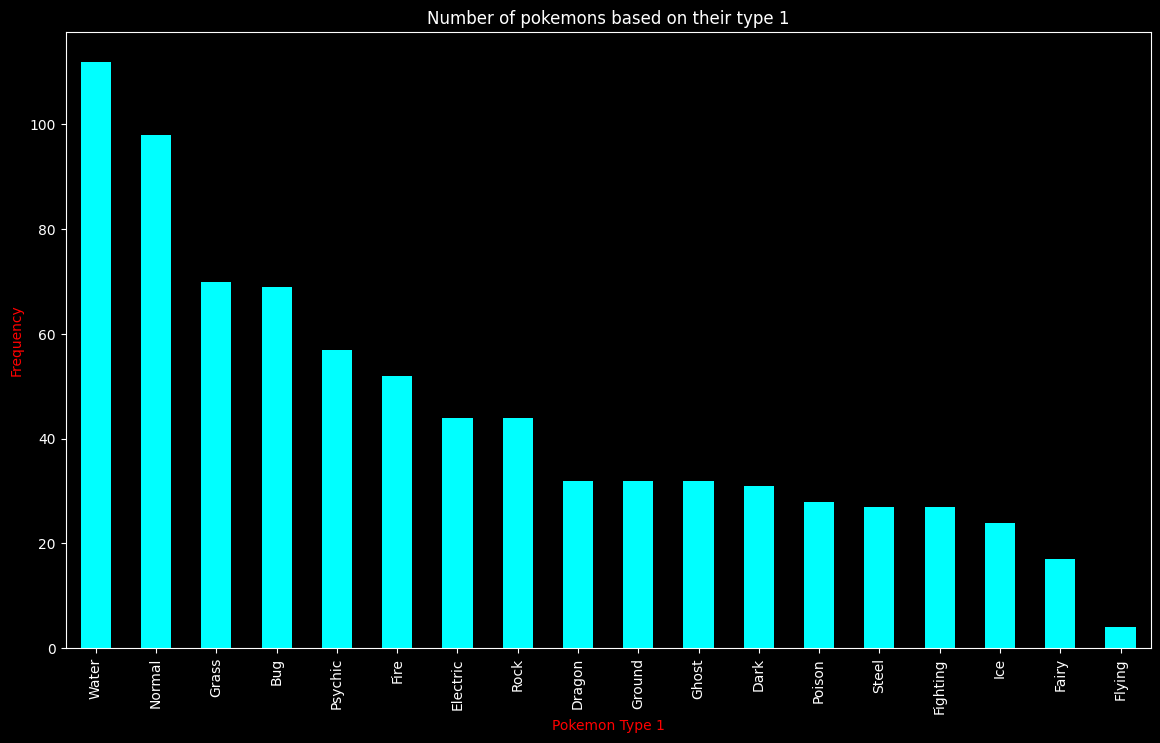

In [229]:
import matplotlib.cm as cm
# Plot the number of pokemon present in each category of "type 1"
ax = pokemon['Type 1'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of pokemons based on their type 1",colormap=cm.cool)
ax.set_xlabel("Pokemon Type 1",color='red')
ax.set_ylabel("Frequency",color='red')

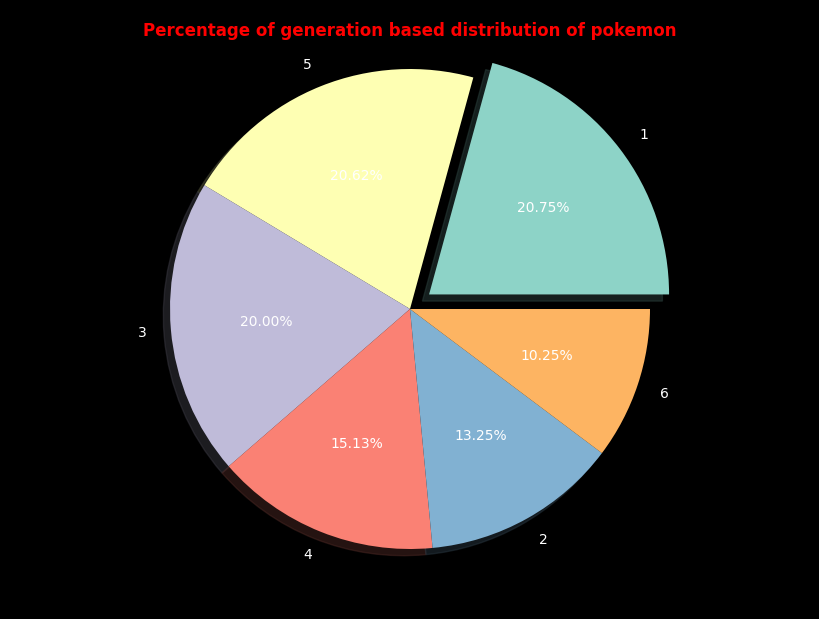

In [230]:
# Plot the number of pokemon present in each generation.
generation =  dict(pokemon['Generation'].value_counts())
gen_counts = generation.values() # No of pokemon in each generation
gen = generation.keys()  # Type of generation
fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of generation based distribution of pokemon",color='red',weight='bold')
ax = fig.add_axes([0,0,1,1])
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
ax.axis('equal')
plt.pie(gen_counts, labels = gen,autopct='%1.2f%%', shadow=True, explode=explode)
plt.show()

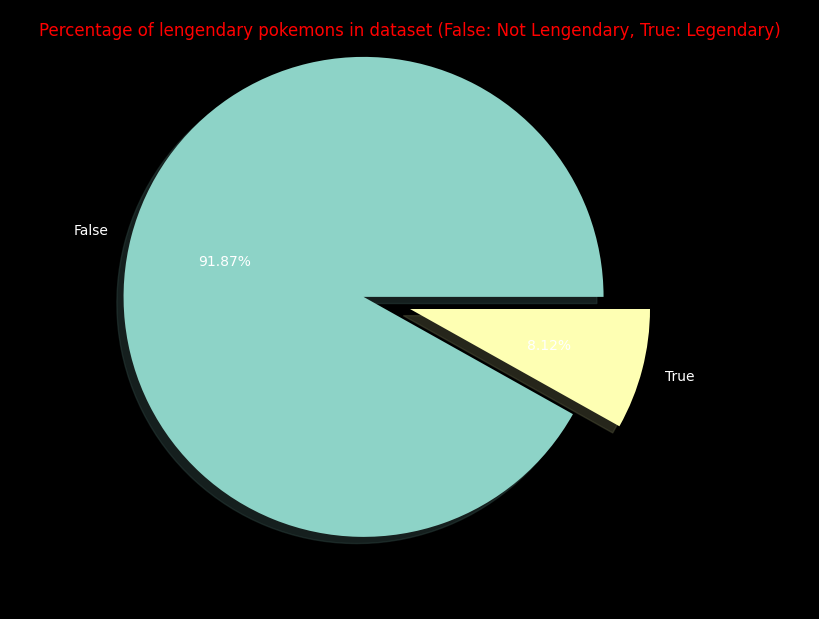

In [231]:
# Plot the number of legendary and non-legendary pokemon
generation =  dict(pokemon['Legendary'].value_counts())
gen_counts = generation.values() 
gen = generation.keys()
fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of lengendary pokemons in dataset (False: Not Lengendary, True: Legendary)",color='red')
ax = fig.add_axes([0,0,1,1])
explode = (0.2, 0)  # explode 1st slice
ax.axis('equal')
plt.pie(gen_counts, labels = gen,autopct='%1.2f%%', shadow=True, explode=explode)
plt.show()

<ipython-input-232-493647bbcc97>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = joined.groupby(['Type 1', 'Type 2']).mean().loc[:, 'strength']


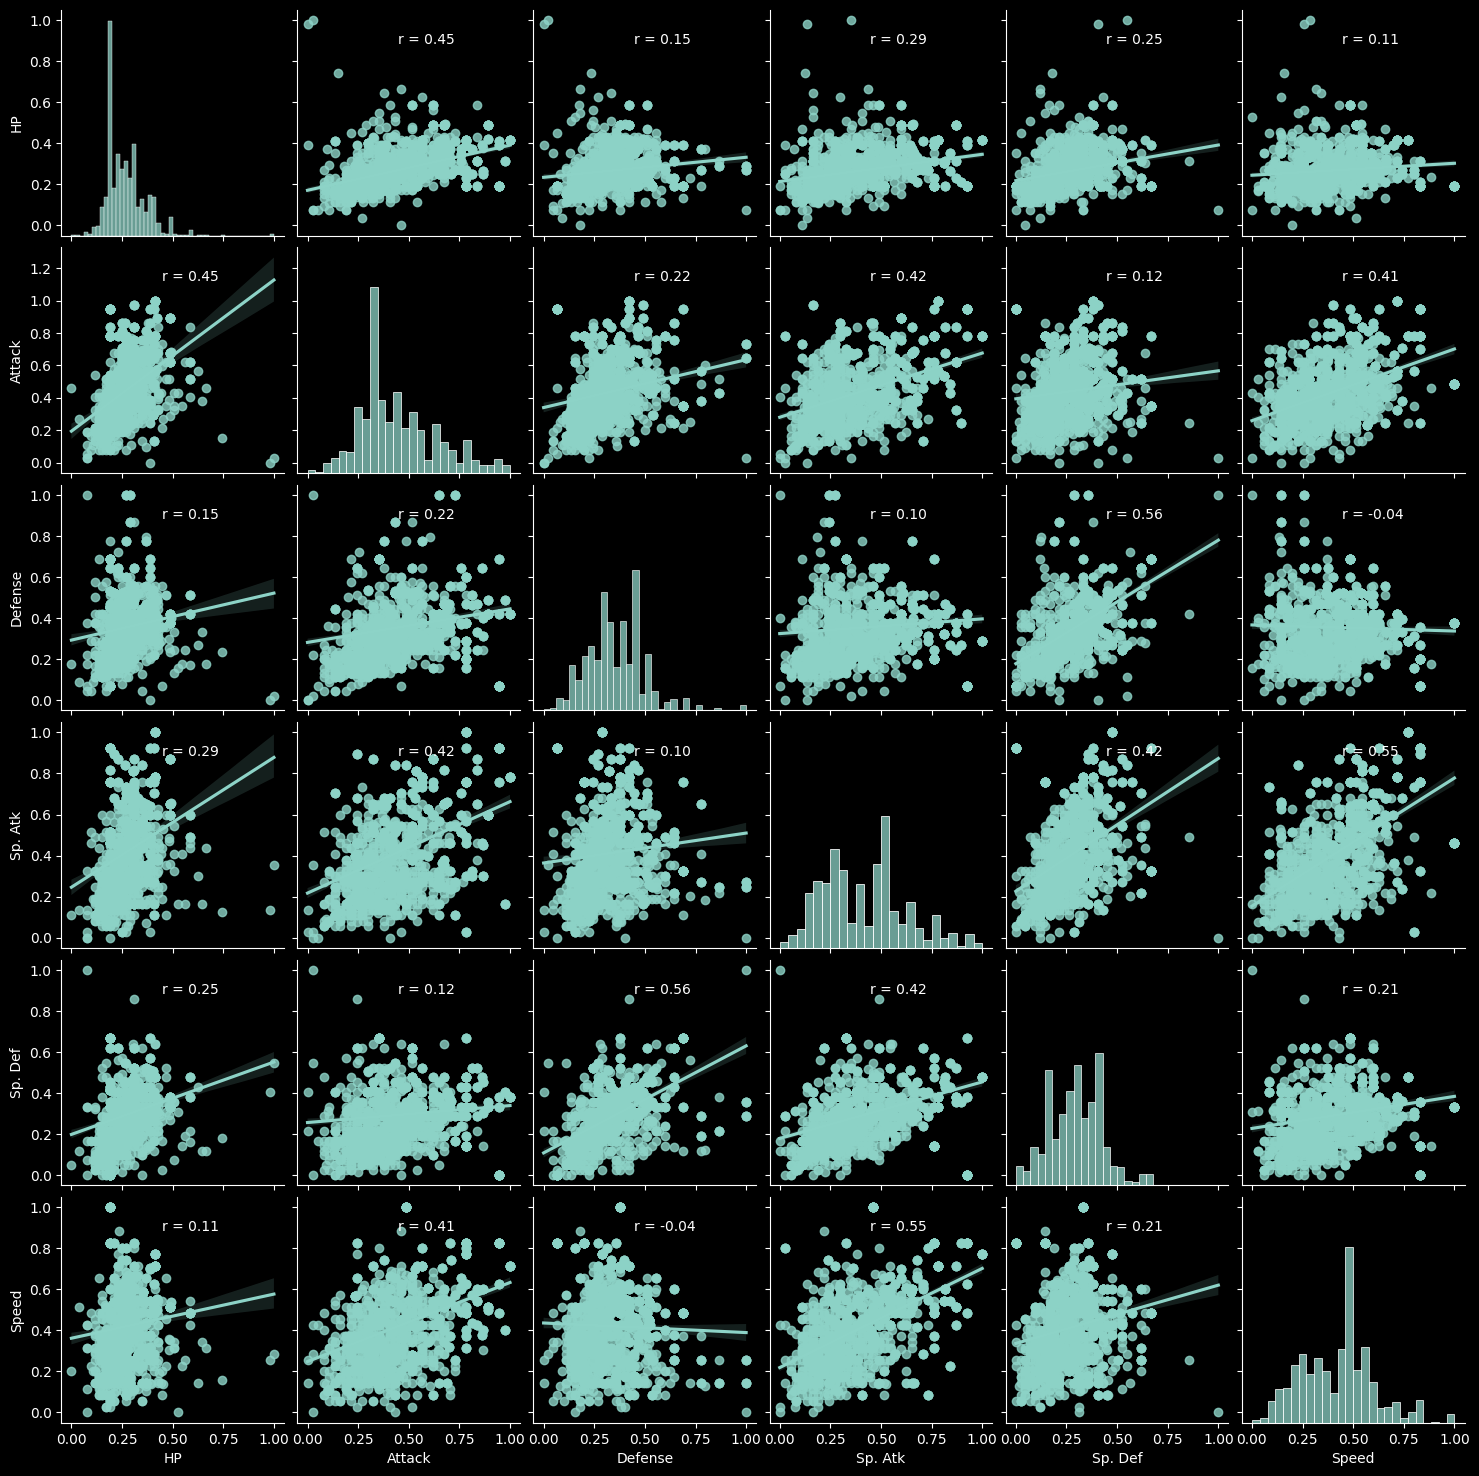

In [232]:
pokicat=pokemon[['#', 'Name', 'Type 1', 'Type 2', 'Generation', 'Legendary']]
pokidigit = pd.merge(
    pokemon,
    pokicat,
    on='#'
).loc[:, ['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

#Normalization
std_stats = pokidigit.set_index('#').apply(
    lambda x: (x - min(x)) /(max(x)-min(x)))
std_stats['strength'] = std_stats.sum(axis='columns')



#top 5 strogest combinations
joined = pd.merge(
    pokicat,
    std_stats,
    on='#'
)

means = joined.groupby(['Type 1', 'Type 2']).mean().loc[:, 'strength']

means.reset_index().sort_values('strength', ascending=False).head()




def show_corr(x, y, **kwargs):
    (r, _) = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(
        'r = {:.2f}'.format(r),
        xy=(0.45, 0.85),
        xycoords=ax.transAxes
    )
sns.pairplot(
    data=joined.loc[:, 'HP':'Speed'],
    kind='reg'
).map_offdiag(show_corr);

* **The code above provided is used to analyze the strength of Pokemon based on their stats. The code first merges two DataFrames, pokemon and pokicat, to create a new DataFrame called pokidigit. The pokidigit DataFrame contains the following columns:**

#: The Pokemon's ID number
* Name: The Pokemon's name
* Type 1: The Pokemon's primary type
* Type 2: The Pokemon's secondary type
* Generation: The generation in which the Pokemon was introduced
* Legendary: Whether or not the Pokemon is legendary
* **The next step in the code is to normalize the stats of the Pokemon. This is done by subtracting the minimum value from each stat and then dividing by the difference between the maximum and minimum values. The normalized stats are then stored in a new DataFrame called std_stats.**

* **The next step in the code is to find the top five strongest Pokemon combinations. This is done by grouping the std_stats DataFrame by the Pokemon's primary and secondary types and then taking the mean of the strength column. The top five combinations are then displayed.**

* **The final step in the code is to create a scatter plot matrix of the Pokemon's stats. The scatter plot matrix shows the correlation between each pair of stats. The correlation coefficient is also displayed on each plot.**

* **Observation:** All have positive r value but not strong correlation

array([[<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Attack'}>],
       [<Axes: title={'center': 'Defense'}>,
        <Axes: title={'center': 'Sp. Atk'}>],
       [<Axes: title={'center': 'Sp. Def'}>,
        <Axes: title={'center': 'Speed'}>]], dtype=object)

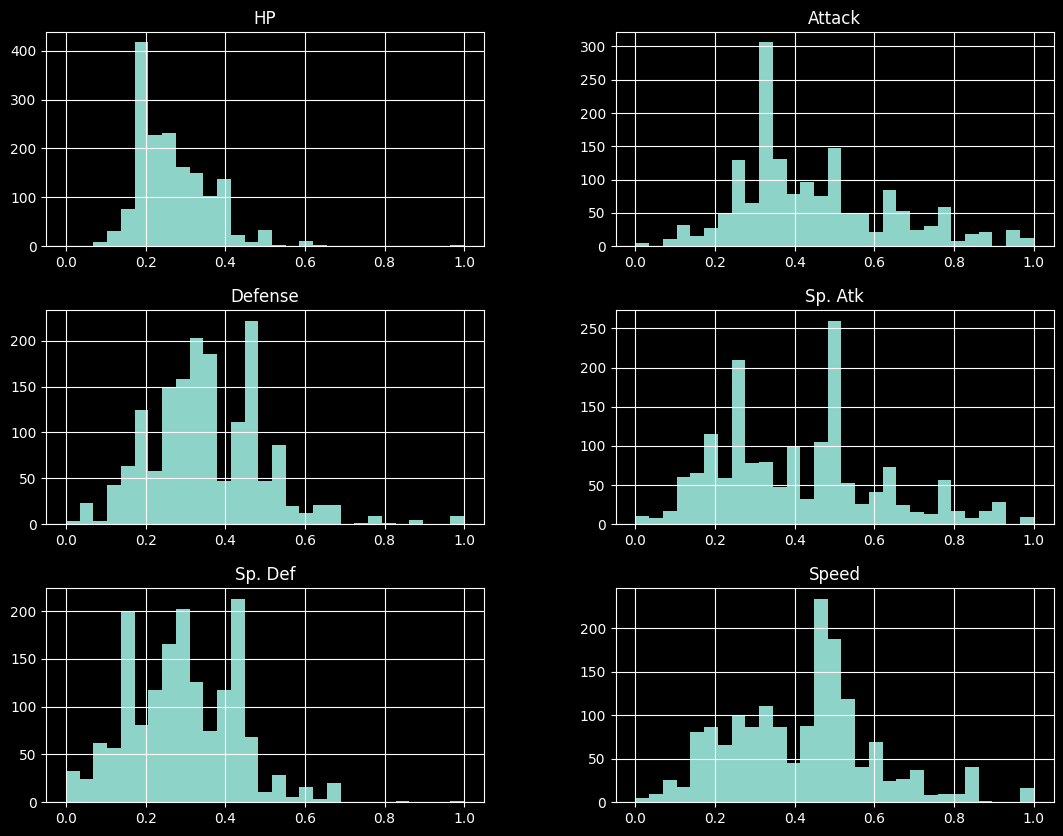

In [233]:
# Hitograms for alll contineous features
%matplotlib inline
joined.hist(column=['HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], bins=29, figsize=(13,10))

<Axes: >

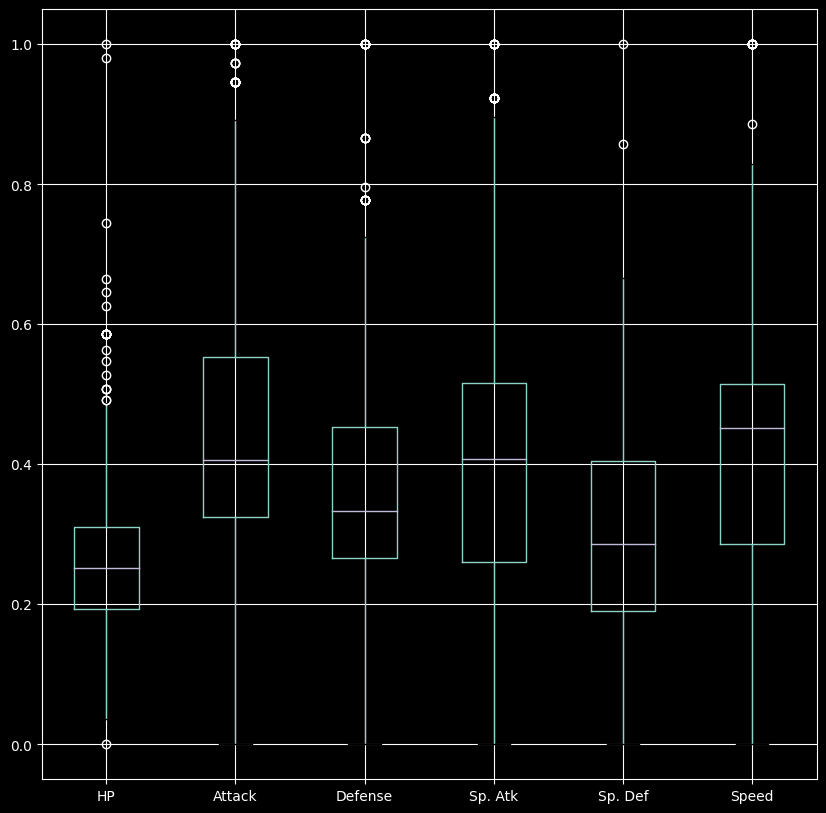

In [234]:
# boxplot
joined.boxplot(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],figsize = (10,10))


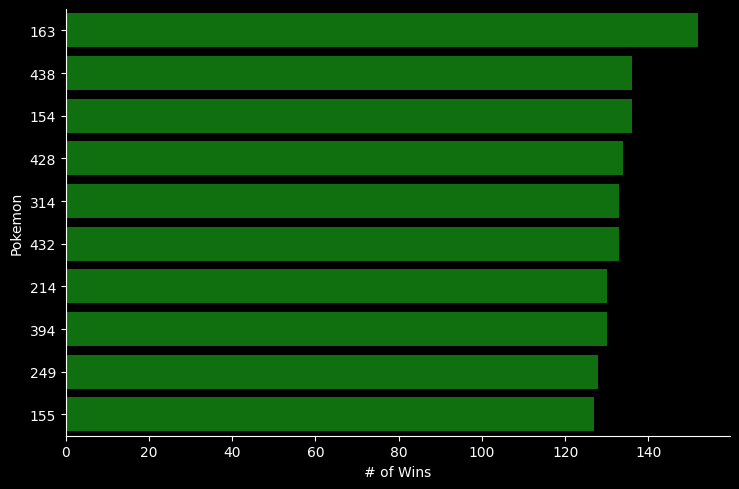

In [235]:
#Pokemons with highest number of wins
sns.catplot(
    y='Winner',
    data=battles,
    kind='count',
    order=battles['Winner'].value_counts().iloc[:10].index,
    aspect=1.5,
    color='green'
).set_axis_labels('# of Wins', 'Pokemon')

* **Top 10 Strongest Pokemon**

In [236]:
std_stats.reset_index(inplace=True)
# Top 10 strongest pokemon
pd.merge(
    pokicat, 
    std_stats, 
    on='#'
).sort_values('strength', ascending=False).head(10)

,#,Name,Type 1,Type 2,Generation,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,strength
260,150,Mewtwo,Psychic,NaN,1,True,0.41,0.78,0.29,1.00,0.48,0.77,3.73
258,150,Mewtwo,Psychic,NaN,1,True,0.41,0.78,0.29,1.00,0.48,0.77,3.73
267,150,MewtwoMega Mewtwo X,Psychic,Fighting,1,True,0.41,0.78,0.29,1.00,0.48,0.77,3.73
276,150,MewtwoMega Mewtwo Y,Psychic,NaN,1,True,0.41,0.78,0.29,1.00,0.48,0.77,3.73
277,150,MewtwoMega Mewtwo Y,Psychic,NaN,1,True,0.41,0.78,0.29,1.00,0.48,0.77,3.73
278,150,MewtwoMega Mewtwo Y,Psychic,NaN,1,True,0.41,0.78,0.29,1.00,0.48,0.77,3.73
269,150,MewtwoMega Mewtwo X,Psychic,Fighting,1,True,0.41,0.78,0.29,1.00,0.48,0.77,3.73
259,150,Mewtwo,Psychic,NaN,1,True,0.41,0.78,0.29,1.00,0.48,0.77,3.73
268,150,MewtwoMega Mewtwo X,Psychic,Fighting,1,True,0.41,0.78,0.29,1.00,0.48,0.77,3.73
257,150,Mewtwo,Psychic,NaN,1,True,0.41,1.00,0.42,0.78,0.38,0.71,3.71


<Axes: xlabel='Total', ylabel='Type 2'>

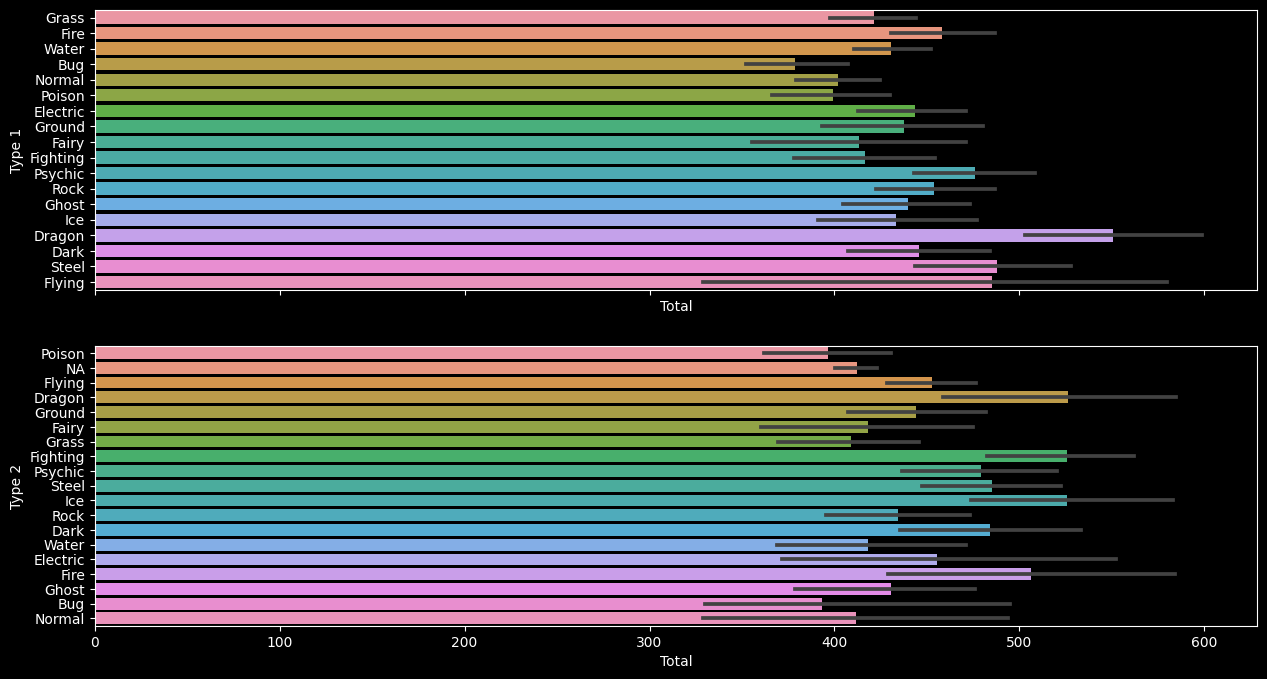

In [245]:
"""
2.4 Most powerful type of pokemon based on type
"""

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
sns.barplot(x='Total', y='Type 1', data=pokemon, ax=ax1)
sns.barplot(x='Total', y='Type 2', data=pokemon, ax=ax2)

<ipython-input-250-95f59e5e6e5d>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(frame['Type 1'].value_counts().index)


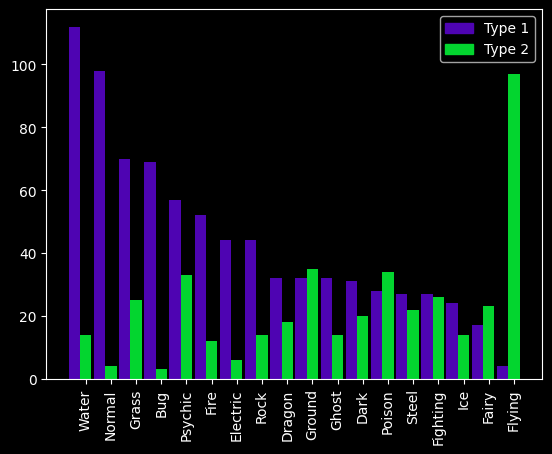

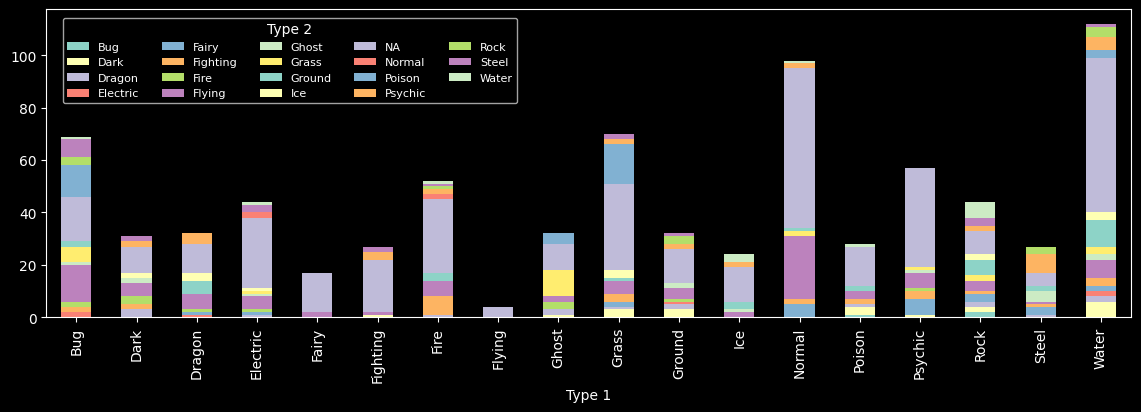

In [250]:
"""
2.5 Number of Pokemon for each type
"""
import matplotlib.patches as patches
import matplotlib.patches as mpatches
# type1 and typ2 in same graph
frame = pokemon.copy()
vals1 = [frame['Type 1'].value_counts()[key] for key in frame['Type 1'].value_counts().index]
vals2 = [frame['Type 2'].value_counts()[key] for key in frame['Type 1'].value_counts().index]
inds = np.arange(len(frame['Type 1'].value_counts().index))
width = .45
color1 = np.random.rand(3)
color2 = np.random.rand(3)
handles = [patches.Patch(color=color1, label='Type 1'), patches.Patch(color=color2, label='Type 2')]
plt.bar(inds, vals1, width, color=color1)
plt.bar(inds + width, vals2, width, color=color2)
plt.gca().set_xticklabels(frame['Type 1'].value_counts().index)
plt.gca().set_xticks(inds + width)
plt.xticks(rotation=90)
plt.legend(handles=handles)


# type1 and type2 (crosstab)
# pokemon_df['type2'] = pokemon_df['type2'].fillna("None")
type_cross = pd.crosstab(pokemon['Type 1'], pokemon['Type 2'])
type_cross.plot.bar(stacked=True, figsize=(14, 4))
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', ncol=5, fontsize=8, title='Type 2')
plt.show()

stats Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary'],
      dtype='object')


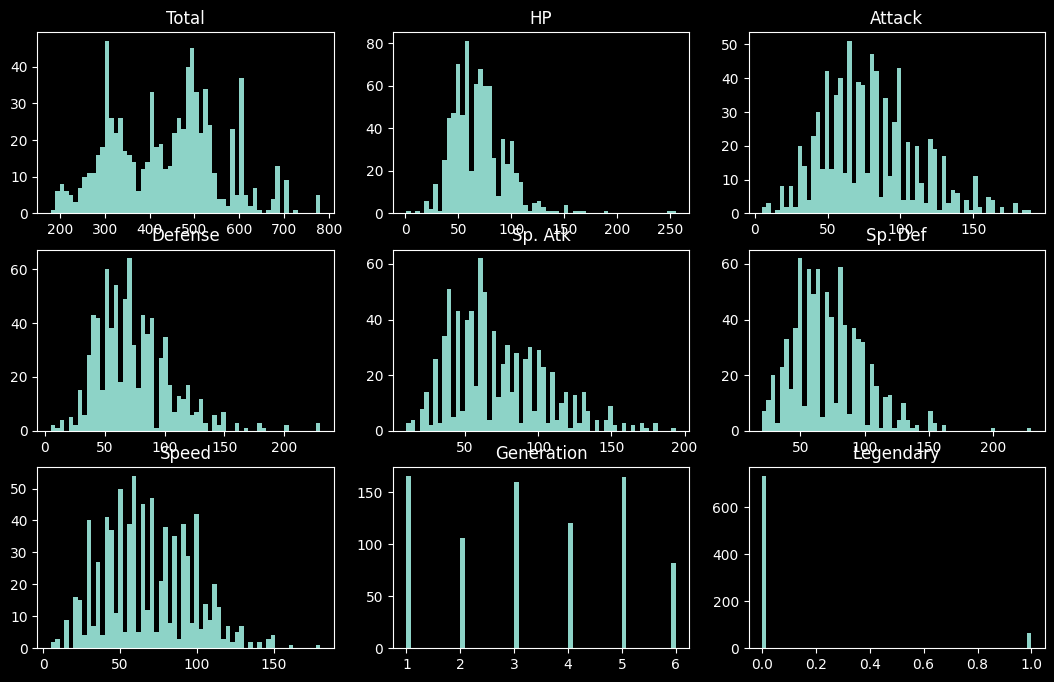

"total" attr
count   800.00
mean    435.10
std     119.96
min     180.00
25%     330.00
50%     450.00
75%     515.00
max     780.00
Name: Total, dtype: float64


<ipython-input-253-f8d3e6334431>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pokemon['Total'])


<Axes: xlabel='Total', ylabel='Density'>

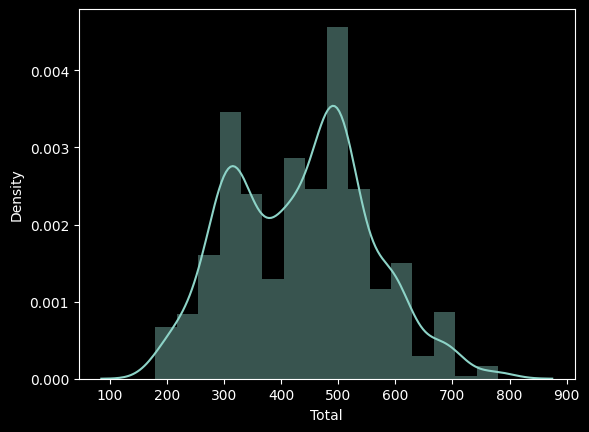

In [253]:
"""
2.6 Stats distribution
"""

stats = pokemon.dtypes[pokemon.dtypes=='int64'].index
stats = stats[1:]
fig = plt.figure(figsize=(13, 8))
for i, stat in enumerate(stats):
    fig.add_subplot(3, 3, i + 1)
    plt.hist(pokemon[stat], bins=60)
    plt.title(stat)

print('stats', stats)
plt.show()

# only "total"
print('"total" attr')
print(pokemon['Total'].describe())
sns.distplot(pokemon['Total'])

types ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
stats Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary'],
      dtype='object')


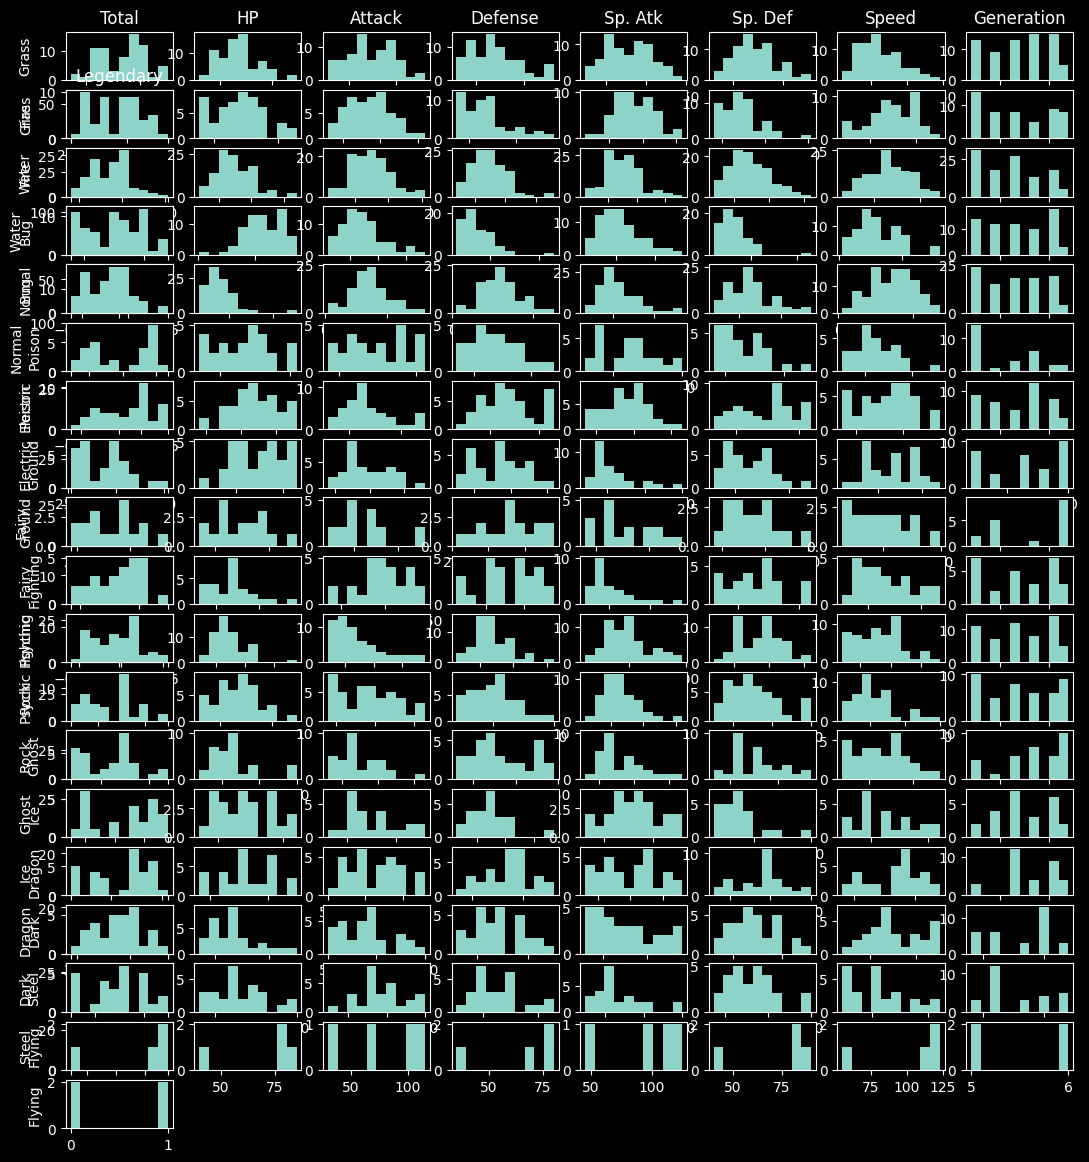

In [254]:
"""
2.7 Stats distribution (per each type1)
"""

types = pokemon['Type 1'].unique()
stats = pokemon.dtypes[pokemon.dtypes=='int64'].index
stats = stats[1:]
fig = plt.figure(figsize=(13, 15))
for j, typ in enumerate(types):
    for i, stat in enumerate(stats):
        fig.add_subplot(20, 8, (j * 8) + i + 1)
        tmp_df = pokemon[pokemon['Type 1']==typ]
        plt.hist(tmp_df[stat], bins=10)
        if (((j * 8) + i) % 8 == 0):
            plt.ylabel(typ)
        if (j == 0):
            plt.title(stat)

print('types', types)
print('stats', stats)
plt.show()

<Axes: xlabel='Type 1'>

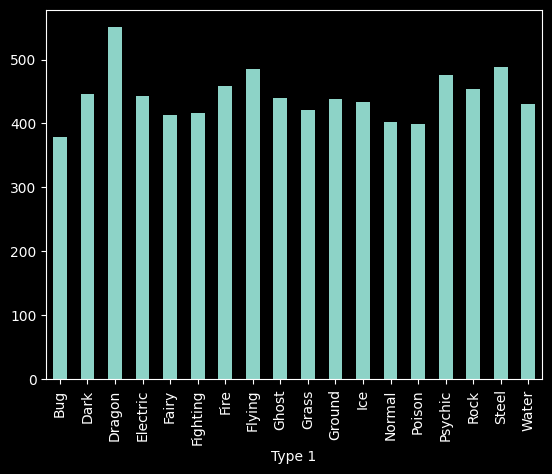

In [255]:
"""
2.8 Average stat per each type1
"""

tmp_df = pokemon.groupby(['Type 1'])['Total'].mean()
tmp_df.plot(kind='bar')

In [257]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

<ipython-input-260-e49c07c814b4>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pokemon_groups_mean = pokemon_groups.mean()


<Axes: ylabel='Defense'>

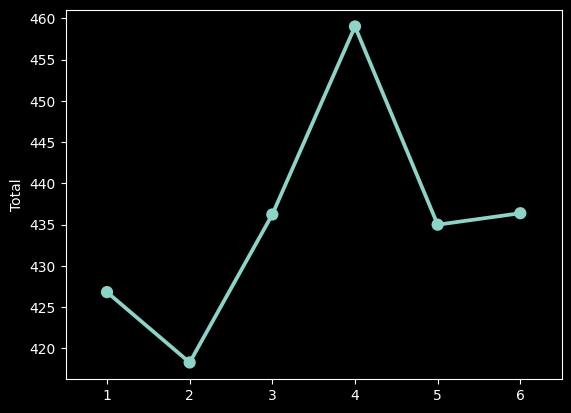

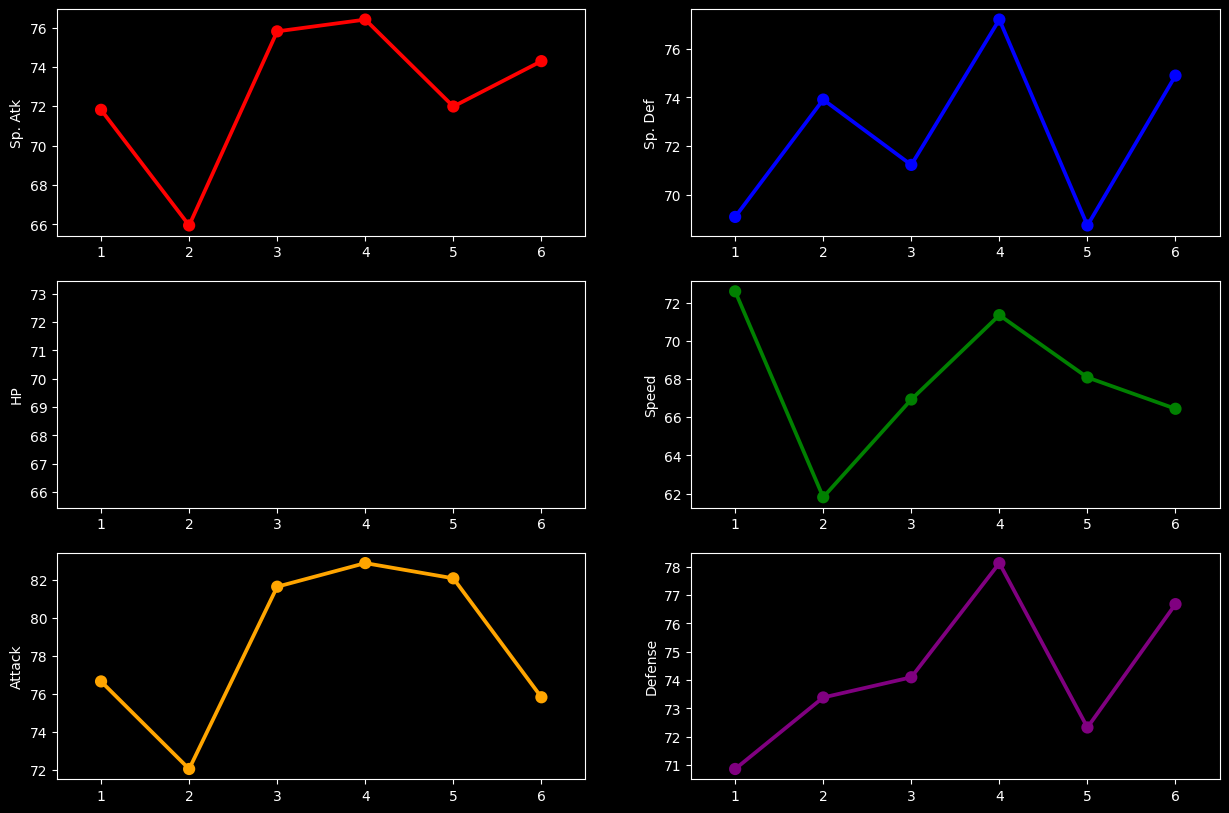

In [260]:
"""
2.9 Average stat per each generation
"""

pokemon_groups = pokemon.groupby('Generation')
pokemon_groups_mean = pokemon_groups.mean()

# total
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Total'])

# other stats
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Sp. Atk'], color='red', ax=axes[0][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Sp. Def'], color='blue', ax=axes[0][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['HP'], color='black', ax=axes[1][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Speed'], color='green', ax=axes[1][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Attack'], color='orange', ax=axes[2][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Defense'], color='purple', ax=axes[2][1])

# 5. Data Preparation

## 5.1 Handle missing data: 

In [237]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Handling Type 2 null value
Column “Type 2” of Pokemon dataset contains empty spots. It’s a categorical column, therefore, I can fill the missing value with the most common value in that column.
But I choose to create another category called NA (Not Applicable). It’s like any other category of “ Type 2 ” column.



In [238]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("NA")

## 5.2 Categorical value to numerical value:
* **A machine learning model works on numbers. We can’t feed it strings or words, therefore we have to convert every categorical value into a numerical value.**

In [239]:
# Convert "Legendary" column, False is converted to 0 and True is converted to 1.
pokemon["Legendary"] = pokemon["Legendary"].astype(int)

In [240]:
pokemon.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0


# **Thank YOU**